In [ ]:
import numpy as np
#list important:
# k_create,
# one_hot_sim, k_exp_horiz

#Set Parameters
n = 7
k_o = 0.4
k_s = 1
alpha = 1 - (2 * (k_o/k_s))
alpha_prime = k_o/k_s
p = 5
q = 2
c_var = 0
lamb_val = np.arccosh((1+c_var)/(1-alpha))

K = {}
K_exp = {}
A = {}

arr_len = n-1
dual_len = (n-1) * 2
dual_len_exp = (n-1)*2 + 2
a = np.zeros(dual_len)
a_exp = np.zeros(dual_len_exp)
b = np.zeros(arr_len)
b_bar = np.zeros(arr_len)
c = np.zeros(1)
c_bar = np.zeros(1) 

def check_variables():
    print('n: ', n)
    print('alpha: ', alpha)
    print('k_s: ', k_s)
    print('k_o: ', k_o)
    print('alpha_prime: ', alpha_prime)
    print('c_var', c_var)
    print('lamb_val', lamb_val)
    print('a', a)
    print('a_exp', a_exp)
    print('b', b)
    print('c', c)


In [ ]:
#K matrix without exceptions
    # return_k = false -> returns offset diagonal  
def tridiag(n):
    arr_len = n-1
    diag_len = arr_len-1
    B = np.diag(np.ones((diag_len)), k=1) + np.diag(np.ones((diag_len)), k=-1)
    return B        

def k_create(n, alpha_prime):
    arr_len = n-1
    A = np.identity(arr_len)
    D = A
    B = alpha_prime*tridiag(n)
    C = B
    E = np.block([[A,B],[B,A]])
    return E

def y_create(n):
    A = np.ones(n-1)
    B = A * -1
    D = np.concatenate([A, B])
    return D

def a_create(n, alpha_prime):
    K = k_create(n, alpha_prime)
    y = y_create(n)
    a = np.linalg.solve(K, y)
    return a

In [ ]:
K = k_create(n,alpha_prime)
print('K', '\n', K)
print('det:', np.linalg.det(K))

y = y_create(n)
a = a_create(n, alpha_prime)

K 
 [[1.  0.  0.  0.  0.  0.  0.  0.4 0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0.4 0.  0.4 0.  0.  0. ]
 [0.  0.  1.  0.  0.  0.  0.  0.4 0.  0.4 0.  0. ]
 [0.  0.  0.  1.  0.  0.  0.  0.  0.4 0.  0.4 0. ]
 [0.  0.  0.  0.  1.  0.  0.  0.  0.  0.4 0.  0.4]
 [0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.4 0. ]
 [0.  0.4 0.  0.  0.  0.  1.  0.  0.  0.  0.  0. ]
 [0.4 0.  0.4 0.  0.  0.  0.  1.  0.  0.  0.  0. ]
 [0.  0.4 0.  0.4 0.  0.  0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.4 0.  0.4 0.  0.  0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.4 0.  0.4 0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0.4 0.  0.  0.  0.  0.  0.  1. ]]
det: 0.12215304601599994


In [ ]:
def test_Ka_y():
    assert np.allclose(K@a, y), "if not equal"
    print('test: K@a = y', '\n')

test_Ka_y()

test: K@a = y 



In [ ]:
import numpy as np
#changing values of k_o to see the behavior

alpha_values = [-1.05, 1.05, 1.1, 1.25, 1.2, .72, -.35]


def alpha_to_k_values(arr):
    arr = np.array(arr)
    return (1 - arr)/2

print(alpha_to_k_values(alpha_values))
k_o_values = alpha_to_k_values(alpha_values)

def k_o_average(k_o_values):
    k_o_avg = 0
    for i in range(0, k_o_values.size):
        k_o_avg = k_o_avg + k_o_values[i]
    k_o_avg = k_o_avg / k_o_values.size
    return k_o_avg

print(k_o_average(k_o_values))
k_o_avg = k_o_average(k_o_values)

def tridiag_with_k_values(n, k_values):
    B = tridiag(n)
    for i in range(B.shape[0]):
        if i < B.shape[0] - 1:
            B[i, i + 1] = k_values[i+1]
            B[i + 1, i] = k_values[i+1]
    return B

print(n)

print(tridiag_with_k_values(n, alpha_to_k_values(alpha_values)))

# Updated k_create function
def k_create_k_o(n, k_o_values):
    arr_len = n-1
    A = np.identity(arr_len)
    B = tridiag_with_k_values(n, k_o_values)
    E = np.block([[A, B], [B, A]])
    return E

print(k_create_k_o(n, k_o_values))

def a_create_k_o(n, k_o_values):
    K = k_create_k_o(n, k_o_values)
    y = y_create(n)
    a = np.linalg.solve(K, y)
    return a

[ 1.025 -0.025 -0.05  -0.125 -0.1    0.14   0.675]
0.22
7
[[ 0.    -0.025  0.     0.     0.     0.   ]
 [-0.025  0.    -0.05   0.     0.     0.   ]
 [ 0.    -0.05   0.    -0.125  0.     0.   ]
 [ 0.     0.    -0.125  0.    -0.1    0.   ]
 [ 0.     0.     0.    -0.1    0.     0.14 ]
 [ 0.     0.     0.     0.     0.14   0.   ]]
[[ 1.     0.     0.     0.     0.     0.     0.    -0.025  0.     0.
   0.     0.   ]
 [ 0.     1.     0.     0.     0.     0.    -0.025  0.    -0.05   0.
   0.     0.   ]
 [ 0.     0.     1.     0.     0.     0.     0.    -0.05   0.    -0.125
   0.     0.   ]
 [ 0.     0.     0.     1.     0.     0.     0.     0.    -0.125  0.
  -0.1    0.   ]
 [ 0.     0.     0.     0.     1.     0.     0.     0.     0.    -0.1
   0.     0.14 ]
 [ 0.     0.     0.     0.     0.     1.     0.     0.     0.     0.
   0.14   0.   ]
 [ 0.    -0.025  0.     0.     0.     0.     1.     0.     0.     0.
   0.     0.   ]
 [-0.025  0.    -0.05   0.     0.     0.     0.     1.     0.    

In [ ]:
def test_K_o_a_y():
    assert np.allclose(k_create_k_o(n, k_o_values)@a_create_k_o(n, k_o_values), y), "if not equal"
    print('test: K@a = y', '\n')

test_K_o_a_y()

test: K@a = y 



In [ ]:
print(k_create_k_o(n, k_o_values)@a_create_k_o(n, k_o_values))


[ 1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1.]


In [ ]:
print(K)
a_k_o_diff = a_create_k_o(n, k_o_values)

[[1.  0.  0.  0.  0.  0.  0.  0.4 0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0.4 0.  0.4 0.  0.  0. ]
 [0.  0.  1.  0.  0.  0.  0.  0.4 0.  0.4 0.  0. ]
 [0.  0.  0.  1.  0.  0.  0.  0.  0.4 0.  0.4 0. ]
 [0.  0.  0.  0.  1.  0.  0.  0.  0.  0.4 0.  0.4]
 [0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.4 0. ]
 [0.  0.4 0.  0.  0.  0.  1.  0.  0.  0.  0.  0. ]
 [0.4 0.  0.4 0.  0.  0.  0.  1.  0.  0.  0.  0. ]
 [0.  0.4 0.  0.4 0.  0.  0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.4 0.  0.4 0.  0.  0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.4 0.  0.4 0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0.4 0.  0.  0.  0.  0.  0.  1. ]]


[ 0.60355142  0.20004573  0.16820097  0.00962037  0.3081788   0.71848765
 -0.60355142 -0.20004573 -0.16820097 -0.00962037 -0.3081788  -0.71848765]


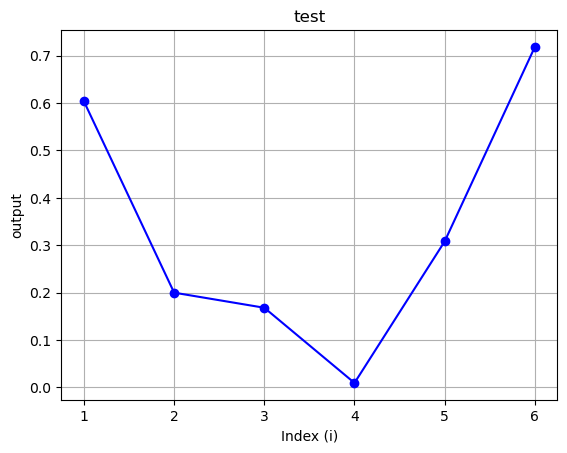

In [ ]:
import matplotlib.pyplot as plt
print(K@a_k_o_diff)

index = list(range(1,n))
test_arr = K@a_k_o_diff

plt.plot(index, test_arr[0:6], marker='o', linestyle='-', color='b')
plt.title(f'test')
plt.xlabel('Index (i)')
plt.ylabel('output')
plt.grid(True)
plt.xticks(index)  # Set the ticks to match the index values
plt.show()


In [ ]:
print(a_k_o_diff)
AC_test = np.array([k_o_avg, k_o_avg, 0, 0, 0, 0, 0, 0, k_o_avg, 0, 0, 0])
print(AC_test)
print(AC_test @ a_k_o_diff)

#generalize
def e_i(n, i):
    len_arr = n-1
    array_pos = i-1     #(-1 to normalize), p and q refer to normal indices (from 1 to len_arr)
    arr = np.zeros(len_arr)
    if i > 0 and i < n: #if outside, k_o excluded from similarity matrix e.g. AE exception for n=5
        arr[array_pos] = 1 
    return arr

def k_test(n, p, q, k_o_avg):
    A = e_i(n, p) + e_i(n, q+1)
    C = e_i(n, p-1) + e_i(n, q+1)
    E = np.concatenate([A,C])
    duplicate = False
    for i in range(0, E.size):
        if E[i] == (k_o_avg * 2):
            duplicate = True
    if duplicate == False:
        E = E * k_o_avg
    else:
        E = E * k_o_avg/2
    return E

testSet = []
for i in range (1, n+1):
    for j in range(1, n+1):
        if(j == i+1):
            continue
        print(k_test(n, i, j, k_o_avg))
        testSet.append(k_test(n, i, j, k_o_avg))
        print('i:', i, 'j:', j)

testSet = np.array(testSet)
print(testSet * a_k_o_diff)


[ 0.9766795   0.93282018  0.85525662  0.78481894  1.08273981  1.15158357
 -0.9766795  -0.93282018 -0.85525662 -0.78481894 -1.08273981 -1.15158357]
[0.22 0.22 0.   0.   0.   0.   0.   0.   0.22 0.   0.   0.  ]
0.23193347180825083
[0.22 0.22 0.   0.   0.   0.   0.   0.22 0.   0.   0.   0.  ]
i: 1 j: 1
[0.22 0.   0.   0.22 0.   0.   0.   0.   0.   0.22 0.   0.  ]
i: 1 j: 3
[0.22 0.   0.   0.   0.22 0.   0.   0.   0.   0.   0.22 0.  ]
i: 1 j: 4
[0.22 0.   0.   0.   0.   0.22 0.   0.   0.   0.   0.   0.22]
i: 1 j: 5
[0.22 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
i: 1 j: 6
[0.22 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
i: 1 j: 7
[0.   0.44 0.   0.   0.   0.   0.22 0.22 0.   0.   0.   0.  ]
i: 2 j: 1
[0.   0.22 0.22 0.   0.   0.   0.22 0.   0.22 0.   0.   0.  ]
i: 2 j: 2
[0.   0.22 0.   0.   0.22 0.   0.22 0.   0.   0.   0.22 0.  ]
i: 2 j: 4
[0.   0.22 0.   0.   0.   0.22 0.22 0.   0.   0.   0.   0.22]
i: 2 j: 5
[0.   0.22 0.   0.   0.   0.   0.22 0.   0.   0.   

In [ ]:
row_sums = np.sum(testSet * a_k_o_diff, axis=1)
print(row_sums)

#TODO: print p,q

[ 0.21486949  0.21486949  0.21486949  0.21486949  0.21486949  0.21486949
 -0.00964905 -0.00964905 -0.00964905 -0.00964905 -0.00964905 -0.00964905
 -0.01706398 -0.01706398 -0.01706398 -0.01706398 -0.01706398 -0.01706398
 -0.01549629 -0.01549629 -0.01549629 -0.01549629 -0.01549629 -0.01549629
  0.06554259  0.06554259  0.06554259  0.06554259  0.06554259  0.06554259
  0.01514563  0.01514563  0.01514563  0.01514563  0.01514563  0.01514563
 -0.25334839 -0.25334839 -0.25334839 -0.25334839 -0.25334839 -0.25334839
 -0.25334839]
